## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  31.502672  1466.016753  0.784474  9.915543  1150.389601
1  44.515662   520.955712  0.220555  5.008372   123.247105
2  34.648532  1267.317552  0.741656  7.551054   940.584845
3  46.337281  1509.640223  0.777594  4.610035  1174.678574
4  17.710817  1462.308646  0.469937  3.271490   687.425244


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9515543	total: 58ms	remaining: 57.9s
1:	learn: 0.9405070	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9281238	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9186175	total: 59.3ms	remaining: 14.8s
4:	learn: 0.9061202	total: 59.9ms	remaining: 11.9s
5:	learn: 0.8967451	total: 60.4ms	remaining: 10s
6:	learn: 0.8835971	total: 60.8ms	remaining: 8.63s
7:	learn: 0.8698168	total: 61.4ms	remaining: 7.61s
8:	learn: 0.8583584	total: 62ms	remaining: 6.83s
9:	learn: 0.8449673	total: 62.5ms	remaining: 6.18s
10:	learn: 0.8341676	total: 62.9ms	remaining: 5.65s
11:	learn: 0.8203890	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8090181	total: 63.7ms	remaining: 4.84s
13:	learn: 0.7979725	total: 64.1ms	remaining: 4.52s
14:	learn: 0.7869676	total: 64.6ms	remaining: 4.24s
15:	learn: 0.7771506	total: 65ms	remaining: 4s
16:	learn: 0.7656633	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7563090	total: 65.9ms	remaining: 3.59s
18:	learn: 0.7482870	total: 66.2ms	remaining: 3.42s
19:

112:	learn: 0.2264733	total: 108ms	remaining: 847ms
113:	learn: 0.2241378	total: 109ms	remaining: 845ms
114:	learn: 0.2214627	total: 109ms	remaining: 840ms
115:	learn: 0.2192294	total: 110ms	remaining: 837ms
116:	learn: 0.2165258	total: 110ms	remaining: 832ms
117:	learn: 0.2145480	total: 111ms	remaining: 828ms
118:	learn: 0.2119937	total: 111ms	remaining: 824ms
119:	learn: 0.2096029	total: 112ms	remaining: 819ms
120:	learn: 0.2073564	total: 112ms	remaining: 814ms
121:	learn: 0.2050656	total: 113ms	remaining: 810ms
122:	learn: 0.2024404	total: 113ms	remaining: 805ms
123:	learn: 0.2000883	total: 113ms	remaining: 801ms
124:	learn: 0.1979412	total: 114ms	remaining: 797ms
125:	learn: 0.1961760	total: 114ms	remaining: 794ms
126:	learn: 0.1941782	total: 115ms	remaining: 790ms
127:	learn: 0.1922455	total: 115ms	remaining: 786ms
128:	learn: 0.1905495	total: 116ms	remaining: 781ms
129:	learn: 0.1884609	total: 116ms	remaining: 778ms
130:	learn: 0.1866360	total: 117ms	remaining: 775ms
131:	learn: 

291:	learn: 0.0560077	total: 186ms	remaining: 450ms
292:	learn: 0.0556793	total: 186ms	remaining: 449ms
293:	learn: 0.0552934	total: 187ms	remaining: 448ms
294:	learn: 0.0549354	total: 187ms	remaining: 447ms
295:	learn: 0.0545641	total: 188ms	remaining: 446ms
296:	learn: 0.0543218	total: 188ms	remaining: 445ms
297:	learn: 0.0540969	total: 188ms	remaining: 444ms
298:	learn: 0.0537892	total: 189ms	remaining: 442ms
299:	learn: 0.0534426	total: 189ms	remaining: 441ms
300:	learn: 0.0531281	total: 190ms	remaining: 440ms
301:	learn: 0.0528070	total: 190ms	remaining: 439ms
302:	learn: 0.0525664	total: 190ms	remaining: 438ms
303:	learn: 0.0522480	total: 191ms	remaining: 436ms
304:	learn: 0.0519336	total: 191ms	remaining: 435ms
305:	learn: 0.0517132	total: 191ms	remaining: 434ms
306:	learn: 0.0515088	total: 192ms	remaining: 433ms
307:	learn: 0.0512815	total: 192ms	remaining: 432ms
308:	learn: 0.0510452	total: 193ms	remaining: 431ms
309:	learn: 0.0508079	total: 193ms	remaining: 430ms
310:	learn: 

525:	learn: 0.0215373	total: 290ms	remaining: 261ms
526:	learn: 0.0214673	total: 290ms	remaining: 261ms
527:	learn: 0.0213985	total: 291ms	remaining: 260ms
528:	learn: 0.0213294	total: 291ms	remaining: 260ms
529:	learn: 0.0212617	total: 292ms	remaining: 259ms
530:	learn: 0.0211934	total: 292ms	remaining: 258ms
531:	learn: 0.0211261	total: 293ms	remaining: 258ms
532:	learn: 0.0210594	total: 293ms	remaining: 257ms
533:	learn: 0.0209731	total: 294ms	remaining: 256ms
534:	learn: 0.0209120	total: 294ms	remaining: 256ms
535:	learn: 0.0208970	total: 295ms	remaining: 255ms
536:	learn: 0.0208193	total: 295ms	remaining: 254ms
537:	learn: 0.0207534	total: 295ms	remaining: 254ms
538:	learn: 0.0207185	total: 296ms	remaining: 253ms
539:	learn: 0.0206256	total: 296ms	remaining: 252ms
540:	learn: 0.0205418	total: 297ms	remaining: 252ms
541:	learn: 0.0204507	total: 297ms	remaining: 251ms
542:	learn: 0.0203371	total: 297ms	remaining: 250ms
543:	learn: 0.0202736	total: 298ms	remaining: 250ms
544:	learn: 

703:	learn: 0.0120937	total: 367ms	remaining: 154ms
704:	learn: 0.0120811	total: 368ms	remaining: 154ms
705:	learn: 0.0120687	total: 368ms	remaining: 153ms
706:	learn: 0.0120566	total: 368ms	remaining: 153ms
707:	learn: 0.0120256	total: 369ms	remaining: 152ms
708:	learn: 0.0119654	total: 369ms	remaining: 152ms
709:	learn: 0.0119253	total: 370ms	remaining: 151ms
710:	learn: 0.0118974	total: 370ms	remaining: 150ms
711:	learn: 0.0118671	total: 370ms	remaining: 150ms
712:	learn: 0.0118373	total: 371ms	remaining: 149ms
713:	learn: 0.0118080	total: 371ms	remaining: 149ms
714:	learn: 0.0117742	total: 372ms	remaining: 148ms
715:	learn: 0.0117624	total: 372ms	remaining: 148ms
716:	learn: 0.0117090	total: 373ms	remaining: 147ms
717:	learn: 0.0116711	total: 373ms	remaining: 146ms
718:	learn: 0.0116381	total: 373ms	remaining: 146ms
719:	learn: 0.0116098	total: 374ms	remaining: 145ms
720:	learn: 0.0115774	total: 374ms	remaining: 145ms
721:	learn: 0.0115497	total: 375ms	remaining: 144ms
722:	learn: 

942:	learn: 0.0059826	total: 471ms	remaining: 28.5ms
943:	learn: 0.0059560	total: 471ms	remaining: 28ms
944:	learn: 0.0059313	total: 472ms	remaining: 27.5ms
945:	learn: 0.0059108	total: 472ms	remaining: 27ms
946:	learn: 0.0058888	total: 473ms	remaining: 26.5ms
947:	learn: 0.0058700	total: 473ms	remaining: 26ms
948:	learn: 0.0058417	total: 474ms	remaining: 25.5ms
949:	learn: 0.0058140	total: 474ms	remaining: 24.9ms
950:	learn: 0.0058061	total: 474ms	remaining: 24.4ms
951:	learn: 0.0057855	total: 475ms	remaining: 23.9ms
952:	learn: 0.0057586	total: 475ms	remaining: 23.4ms
953:	learn: 0.0057323	total: 476ms	remaining: 22.9ms
954:	learn: 0.0057067	total: 476ms	remaining: 22.4ms
955:	learn: 0.0057016	total: 476ms	remaining: 21.9ms
956:	learn: 0.0056966	total: 477ms	remaining: 21.4ms
957:	learn: 0.0056890	total: 477ms	remaining: 20.9ms
958:	learn: 0.0056716	total: 478ms	remaining: 20.4ms
959:	learn: 0.0056600	total: 478ms	remaining: 19.9ms
960:	learn: 0.0056429	total: 479ms	remaining: 19.4ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

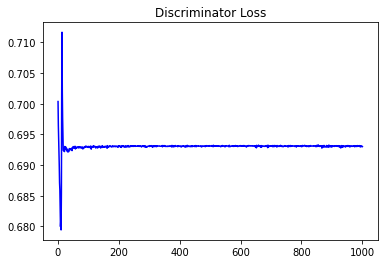

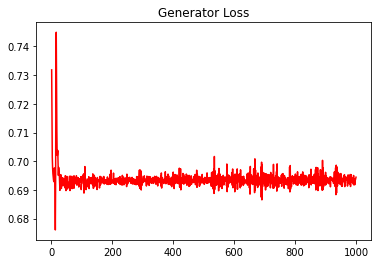

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.015541549505804756


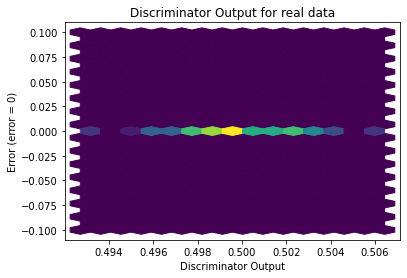

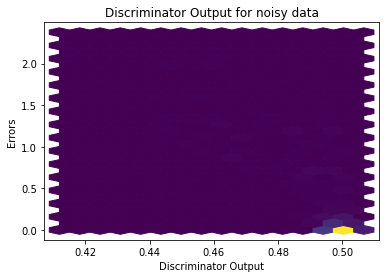

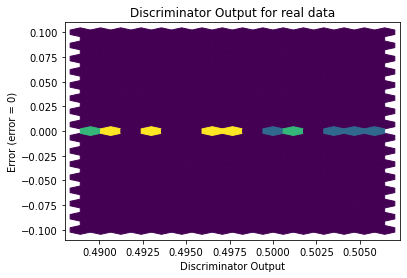

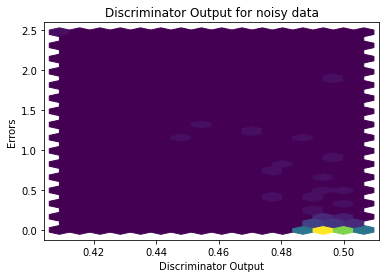

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


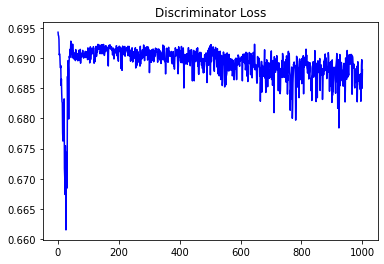

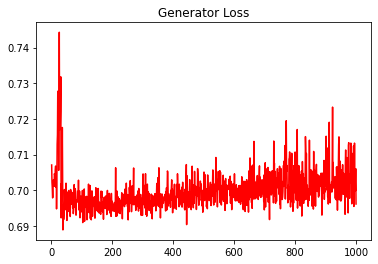

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.007330046401806855


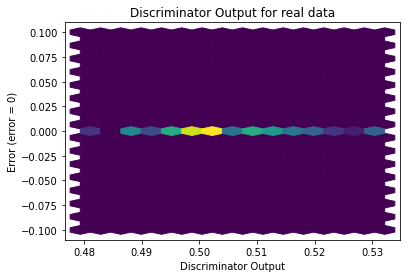

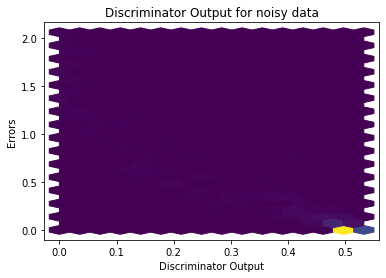

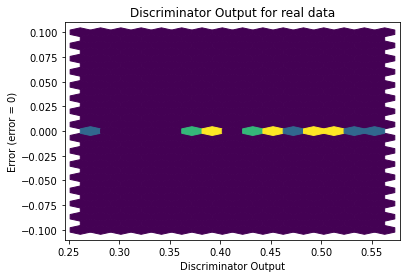

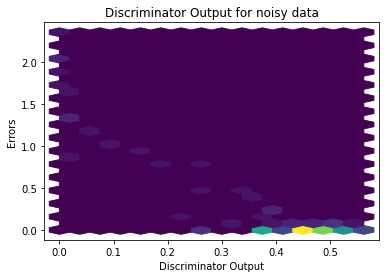

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1789]], requires_grad=True)
